In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pickle

# For data preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# For machine learning models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# For evaluation
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the dataset
training_data = pd.read_csv('../dataset/Training.csv')
testing_data = pd.read_csv('../dataset/Training.csv')

In [3]:
training_data.head(), training_data.describe(), training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


(   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
 0        1          1                     1                    0          0   
 1        0          1                     1                    0          0   
 2        1          0                     1                    0          0   
 3        1          1                     0                    0          0   
 4        1          1                     1                    0          0   
 
    chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
 0       0           0             0        0                 0  ...         0   
 1       0           0             0        0                 0  ...         0   
 2       0           0             0        0                 0  ...         0   
 3       0           0             0        0                 0  ...         0   
 4       0           0             0        0                 0  ...         0   
 
    skin_peeling  silver

In [5]:
# Re-check unique values in the 'prognosis' column to understand disease classification
unique_prognoses = training_data['prognosis'].unique()

# Display unique disease classes and their count
unique_prognoses, len(unique_prognoses)


(array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
        'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
        'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
        'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
        'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
        'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
        'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
        'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
        'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
        'Osteoarthristis', 'Arthritis',
        '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
        'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object),
 41)

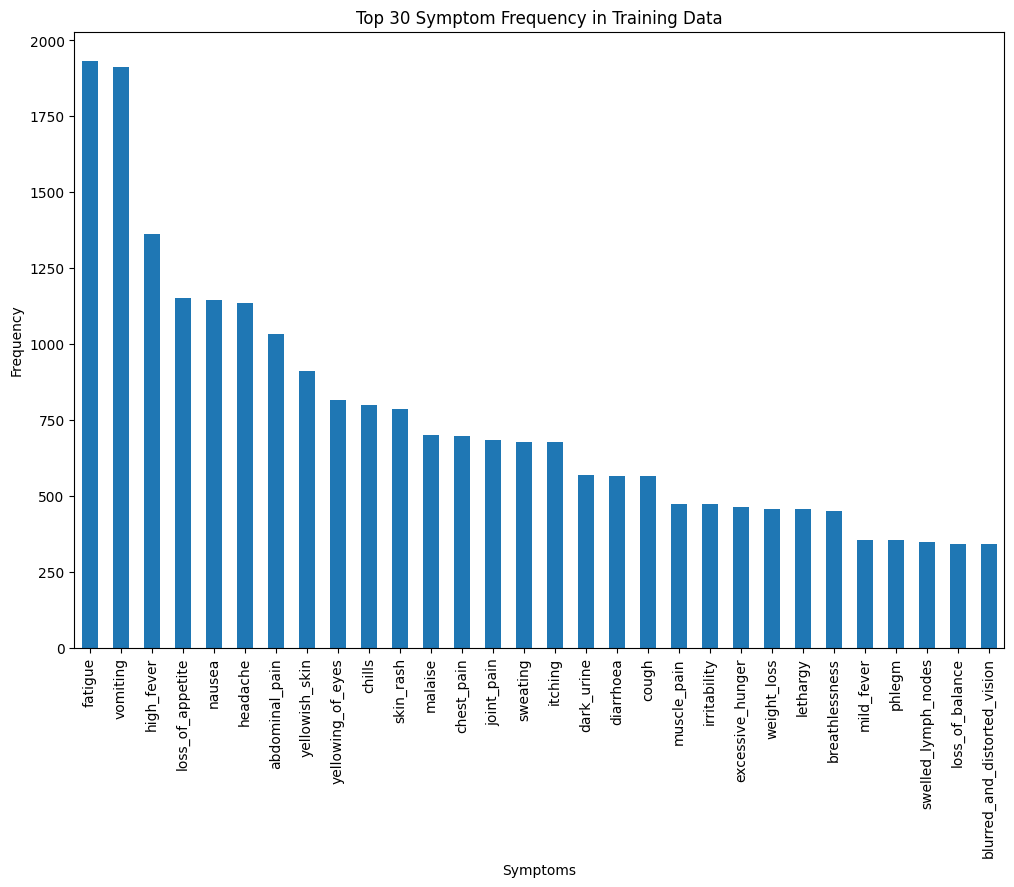

In [7]:
import matplotlib.pyplot as plt

# Count the frequency of each symptom in the training data (excluding the 'prognosis' column)
symptom_counts = training_data.drop('prognosis', axis=1).sum().sort_values(ascending=False)

# Plotting the symptom frequency
plt.figure(figsize=(12, 8))
symptom_counts.head(30).plot(kind='bar')  # Displaying the top 30 symptoms for clarity
plt.title('Top 30 Symptom Frequency in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Symptoms')
plt.xticks(rotation=90)
plt.show()


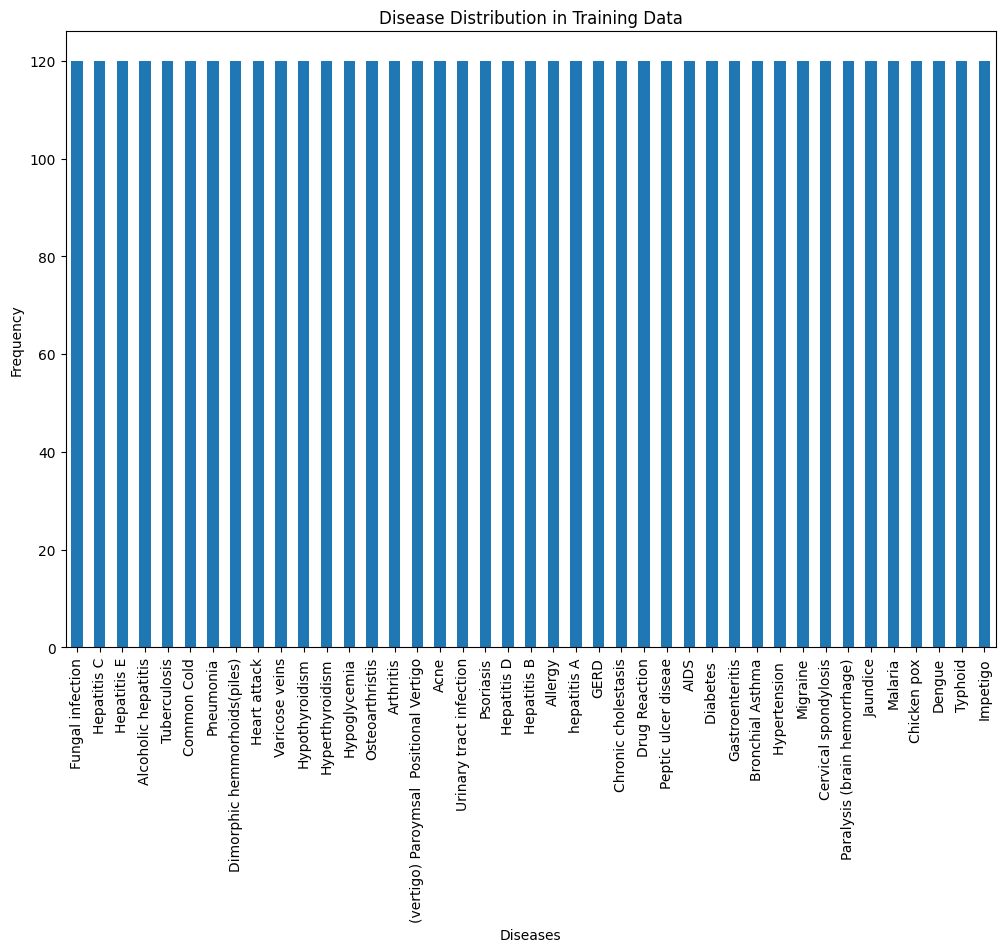

In [8]:
# Count the frequency of each disease in the 'prognosis' column
disease_counts = training_data['prognosis'].value_counts()

# Plotting the disease distribution
plt.figure(figsize=(12, 8))
disease_counts.plot(kind='bar')
plt.title('Disease Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Diseases')
plt.xticks(rotation=90)
plt.show()


In [9]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for the 'prognosis' column
label_encoder = LabelEncoder()
training_data['prognosis'] = label_encoder.fit_transform(training_data['prognosis'])

# Split data into features and target
X_train = training_data.drop('prognosis', axis=1)
y_train = training_data['prognosis']

# Show transformed target variable
y_train.head(), label_encoder.classes_


(0    15
 1    15
 2    15
 3    15
 4    15
 Name: prognosis, dtype: int64,
 array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
        'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
        'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
        'Common Cold', 'Dengue', 'Diabetes ',
        'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
        'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
        'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
        'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
        'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
        'Osteoarthristis', 'Paralysis (brain hemorrhage)',
        'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
        'Typhoid', 'Urinary tract infection', 'Varicose veins',
        'hepatitis A'], dtype=object))

In [10]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for the 'prognosis' column
label_encoder = LabelEncoder()
training_data['prognosis'] = label_encoder.fit_transform(training_data['prognosis'])

# Split data into features and target
X_train = training_data.drop('prognosis', axis=1)
y_train = training_data['prognosis']

# Show transformed target variable and the corresponding disease classes
y_train.head(), label_encoder.classes_


(0    15
 1    15
 2    15
 3    15
 4    15
 Name: prognosis, dtype: int64,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]))

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the training data (to check in-sample accuracy)
y_pred_train = model.predict(X_train)

# Calculate and print the accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", conf_matrix)


Training Accuracy: 100.00%
Confusion Matrix:
 [[120   0   0 ...   0   0   0]
 [  0 120   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   0]
 [  0   0   0 ...   0 120   0]
 [  0   0   0 ...   0   0 120]]


In [12]:
# Split the training data into a smaller train set and a validation set
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the model on the training part
model.fit(X_train_part, y_train_part)

# Predict on the validation set
y_pred_val = model.predict(X_val)

# Calculate and print the accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))


Validation Accuracy: 100.00%
